In [1]:
import os, cv2, itertools
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython import display
from sklearn.utils import *

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib
import torch.nn as nn
import torch.optim as optim
from tqdm.notebook import tqdm
import math
from keras.layers import Dense, Dropout, Activation, Flatten
from torch.utils.data import TensorDataset, DataLoader


2022-04-13 17:07:54.231757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/gagandeep/.local/lib/python3.8/site-packages/cv2/../../lib64:/usr/local/lib:
2022-04-13 17:07:54.231780: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
TRAIN_DIR = './archive/level_5/'
ROWS = 32
COLS = 32
CHANNELS = 3
NUM_OF_LETTERS = 5

In [5]:
def generate_y():
    filename = './archive/labels_level_5.csv'
    df = pd.read_csv(filename)
    y = []
    y_digits = []
    for i in range(df.shape[0]):
        label = np.zeros((NUM_OF_LETTERS, 10))
        digits = [int(d) for d in str(df.iloc[i, 1])]

        for j in range(NUM_OF_LETTERS):
            label[j, digits[j]] = 1
        
        y.append(label)
        y_digits.append(digits)
    
    return y,y_digits

In [6]:
train_images = [TRAIN_DIR+i for i in sorted(os.listdir(TRAIN_DIR))]

In [7]:
print(len(train_images))
train_images[0]

10000


'./archive/level_5/file_1.png'

In [8]:
def prep_data(images):
    X = []
    m = len(images)
    n_x = CHANNELS * ROWS * COLS
    k = 0
    for i in images:
        img = cv2.imread(i)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (32, 32), interpolation=cv2.INTER_AREA)
        img = np.transpose(img, (2, 0, 1))
        #img = cv2.resize(img, (32, 32))
        #img = cv2.resize(img, (int(135/2), int(50/2)), interpolation=cv2.INTER_AREA)
        #img = np.reshape(img, (img.shape[0], img.shape[1], 3))
        
        #img = np.reshape(img, (1,img.shape[0], img.shape[1])) / 255
        X.append(img)
    return X

In [9]:
X_train = prep_data(train_images)

In [10]:
type(X_train)

list

In [11]:
X_train[0].shape

(3, 32, 32)

In [12]:
y_train, y_digits = generate_y()

In [13]:
y_digits[1]

[7, 4, 9, 1, 9]

In [14]:
y_train[1]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [15]:
y_train[0].shape

(5, 10)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [17]:
X_test[0].shape

(3, 32, 32)

In [18]:
y_test[0].shape

(5, 10)

In [19]:
# y_train=y_train.reshape(y_train.shape[0],1)
# y_train=normalize(y_train,norm='l2')
# y_test=y_test.reshape(y_test.shape[0],1)
# y_test=normalize(y_test,norm='l2')

In [20]:
X_train = torch.Tensor(X_train) # transform to torch tensor
# X_train = tf.convert_to_tensor(X_train, dtype=tf.int64)
y_train = torch.Tensor(y_train)
# y_train = tf.convert_to_tensor(y_train, dtype=tf.int64)

# X_train = Variable(torch.from_numpy(X_train)).type(torch.LongTensor)
# y_train = Variable(torch.from_numpy(y_train)).type(torch.LongTensor)


my_dataset = TensorDataset(X_train, y_train) # create your dataset
trainloader = DataLoader(my_dataset, batch_size=32)

/tmp/ipykernel_2355720/1270877923.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  X_train = torch.Tensor(X_train) # transform to torch tensor


In [21]:
X_train.shape

torch.Size([8000, 3, 32, 32])

In [22]:
X_test = torch.Tensor(X_test) # transform to torch tensor
y_test = torch.Tensor(y_test)

my_testdataset = TensorDataset(X_test, y_test) # create your datset
testloader = DataLoader(my_testdataset, batch_size=32)

In [23]:
epochs = 10
batch_size = 32
learning_rate = 0.01
momentum = 0.9
log_interval = 10

RESNET

In [24]:
from parameters import *
import torch as t
from torch import nn
import torch.nn.functional as F
import os


class ResidualBlock(nn.Module):
    def __init__(self, inchannel, outchannel, stride=1):
        super().__init__()
        self.left = nn.Sequential(
            nn.Conv2d(inchannel, outchannel, kernel_size=3, stride=stride, padding=1, bias=False),
            nn.BatchNorm2d(outchannel, track_running_stats=True),
            nn.ReLU(inplace=True),
            nn.Conv2d(outchannel, outchannel, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(outchannel, track_running_stats=True)
        )
        self.shortcut = nn.Sequential()
        if stride != 1 or inchannel != outchannel:
            self.shortcut = nn.Sequential(
                nn.Conv2d(inchannel, outchannel, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(outchannel, track_running_stats=True)
            )

    def forward(self, x):
        out = self.left(x)
        out += self.shortcut(x)
        out = F.relu(out)
        return out

In [25]:
class ResNet(nn.Module):
    def __init__(self, ResidualBlock, num_classes=10):
        super().__init__()
        self.inchannel = 64
        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64, track_running_stats=True),
            nn.ReLU(),
        )
        self.layer1 = self.make_layer(ResidualBlock, 64, 2, stride=1)
        self.layer2 = self.make_layer(ResidualBlock, 128, 2, stride=2)
        self.layer3 = self.make_layer(ResidualBlock, 256, 2, stride=2)
        self.layer4 = self.make_layer(ResidualBlock, 512, 2, stride=2)
        self.layer5 = self.make_layer(ResidualBlock, 1024, 2, stride=2)
        
        self.fc = nn.Linear(in_features=1024, out_features=50)
        self.softmax = nn.Softmax(1)
        
    def make_layer(self, block, channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.inchannel, channels, stride))
            self.inchannel = channels
        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)  # [3, 32, 32] -> [64, 32, 32]
        x = self.layer1(x)  # -> [64, 32, 32] -> [64, 32, 32]
        x = self.layer2(x)  # -> [128, 16, 16] -> [128, 16, 16], floor in conv2d
        x = self.layer3(x)  # -> [256, 8, 8] -> [256, 8, 8]
        x = self.layer4(x)  # -> [512, 4, 4] -> [512, 4, 4]
        x = self.layer5(x)  # -> [1024, 2, 2] -> [1024, 2, 2]
        x = F.avg_pool2d(x, 2)  # -> [1024, 1, 1]
        x = x.view(-1, 1024)  # -> [1, 1024]        
        x = self.fc(x)
        x = torch.reshape(x,(-1,5,10))
        x = self.softmax(x)
        return x

In [26]:
net = ResNet(ResidualBlock)
print(net)

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inp

In [27]:
# the loss function
criterion = nn.CrossEntropyLoss(reduction='none')
# the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [28]:
def train(model, trainloader, optimizer, criterion):
    model.train()
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    y_decoded=[]
    y_predicted=[]
    total_acc = 0
    acc_in_img = [0] * 5
    
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader),position=0, leave=True):
        counter += 1
        image, labels = data
        optimizer.zero_grad()
        # forward pass
        outputs = model(image)

        y_decoded = []
        for i,x in enumerate(labels):
            _, code = torch.max(x.data, 1) 
            y_decoded.append(code)

        # calculate the loss
        outputs_loss=torch.reshape(outputs,(-1,10,5))
        labels_loss=torch.reshape(labels,(-1,10,5))
        
        loss = criterion(outputs_loss, labels_loss)

        loss=loss.mean(dim=1)

        loss=loss.mean(dim=0)   
        
        train_running_loss += loss.item()
        
        y_predicted = []  
        # calculate the accuracy
        for i,x in enumerate(outputs):
            _, code = torch.max(x.data, 1) 
            y_predicted.append(code)
        
        for i, j in zip(y_predicted,y_decoded):
            
            if (i==j).sum().item() == 5 :
                total_acc += 1
#                 print("correctly classified image", i, j)
                
            for z, (preds, labels) in enumerate(zip(i, j)):
                if preds == labels:
                    acc_in_img[z] += 1
           
        loss.backward()
        
        #update the grad values
        optimizer.step()

    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (total_acc / len(trainloader.dataset))
    for i in range(5):
        acc_in_img[i] = acc_in_img[i]/ len(trainloader.dataset)
        print("digit " + str(i) + " accuracy: " + str(acc_in_img[i]))
    return epoch_loss, epoch_acc, acc_in_img

In [29]:
def validate(model, testloader, criterion):
    model.eval()
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    y_decoded=[]
    y_predicted=[]
    test_acc_in_img=[0]*5
    total_acc = 0
    
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1   
            image, labels = data
            # forward pass
            outputs = model(image)
            y_decoded=[]
            for i,x in enumerate(labels):
                _, code = torch.max(x.data, 1) 
                y_decoded.append(code)              
                
            # calculate the loss
            outputs_loss=torch.reshape(outputs,(-1,10,5))
            labels_loss=torch.reshape(labels,(-1,10,5))

            loss = criterion(outputs_loss, labels_loss)
            loss=loss.mean(dim=1)

            loss=loss.mean(dim=0)   

            valid_running_loss += loss.item()
            # calculate the accuracy for each class
            y_predicted=[]
            for i,x in enumerate(outputs):
                _, code = torch.max(x.data, 1) 
                y_predicted.append(code)
        
            for i, j in zip(y_predicted,y_decoded):

                if (i==j).sum().item() == 5 :
                    total_acc += 1
#                     print("correctly classified image", i, j)
                for z, (preds, labels) in enumerate(zip(i, j)):
                    if preds == labels:
                        test_acc_in_img[z] += 1
        
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (total_acc / len(testloader.dataset))
    for i in range(5):
        test_acc_in_img[i] = test_acc_in_img[i] / len(testloader.dataset)
        print("digit " + str(i) + " accuracy: " + str(test_acc_in_img[i]))
    
    return epoch_loss, epoch_acc , test_acc_in_img

In [30]:
# start the training
# lists to keep track of losses and accuracies
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
train_digit_arr, valid_digit_arr =[], []
for epoch in range(epochs):
    print(f"Epoch {epoch+1} of {epochs}")
    train_epoch_loss, train_epoch_acc , train_acc_in_img = train(net, trainloader, 
                                              optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc , test_acc_in_img = validate(net, testloader,  
                                                 criterion)
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    train_digit_arr.append(train_acc_in_img)
    valid_digit_arr.append(test_acc_in_img)
    print('\n')
    print(f"Training loss: {train_epoch_loss:.3f}, Training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, Validation acc: {valid_epoch_acc:.3f}")
    print('-' * 60)

Epoch 1 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.110625
digit 1 accuracy: 0.1
digit 2 accuracy: 0.100625
digit 3 accuracy: 0.0975
digit 4 accuracy: 0.099625
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.108
digit 1 accuracy: 0.1035
digit 2 accuracy: 0.0975
digit 3 accuracy: 0.1025
digit 4 accuracy: 0.099


Training loss: 2.304, Training acc: 0.000
Validation loss: 2.306, Validation acc: 0.000
------------------------------------------------------------
Epoch 2 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.128
digit 1 accuracy: 0.113625
digit 2 accuracy: 0.11175
digit 3 accuracy: 0.110375
digit 4 accuracy: 0.115
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.106
digit 1 accuracy: 0.114
digit 2 accuracy: 0.099
digit 3 accuracy: 0.091
digit 4 accuracy: 0.1015


Training loss: 2.298, Training acc: 0.000
Validation loss: 2.308, Validation acc: 0.000
------------------------------------------------------------
Epoch 3 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.161125
digit 1 accuracy: 0.130375
digit 2 accuracy: 0.139375
digit 3 accuracy: 0.14075
digit 4 accuracy: 0.13425
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1055
digit 1 accuracy: 0.11
digit 2 accuracy: 0.106
digit 3 accuracy: 0.1015
digit 4 accuracy: 0.095


Training loss: 2.283, Training acc: 0.025
Validation loss: 2.314, Validation acc: 0.000
------------------------------------------------------------
Epoch 4 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.208
digit 1 accuracy: 0.165125
digit 2 accuracy: 0.18925
digit 3 accuracy: 0.18175
digit 4 accuracy: 0.165
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1125
digit 1 accuracy: 0.103
digit 2 accuracy: 0.0955
digit 3 accuracy: 0.1
digit 4 accuracy: 0.0955


Training loss: 2.253, Training acc: 0.037
Validation loss: 2.324, Validation acc: 0.000
------------------------------------------------------------
Epoch 5 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.267375
digit 1 accuracy: 0.20125
digit 2 accuracy: 0.22875
digit 3 accuracy: 0.23375
digit 4 accuracy: 0.20925
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1115
digit 1 accuracy: 0.1045
digit 2 accuracy: 0.1025
digit 3 accuracy: 0.0985
digit 4 accuracy: 0.091


Training loss: 2.208, Training acc: 0.037
Validation loss: 2.330, Validation acc: 0.000
------------------------------------------------------------
Epoch 6 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.32575
digit 1 accuracy: 0.245125
digit 2 accuracy: 0.284625
digit 3 accuracy: 0.276125
digit 4 accuracy: 0.2635
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.104
digit 1 accuracy: 0.0975
digit 2 accuracy: 0.1005
digit 3 accuracy: 0.0915
digit 4 accuracy: 0.0925


Training loss: 2.156, Training acc: 0.125
Validation loss: 2.343, Validation acc: 0.000
------------------------------------------------------------
Epoch 7 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.388
digit 1 accuracy: 0.288125
digit 2 accuracy: 0.332875
digit 3 accuracy: 0.331
digit 4 accuracy: 0.317375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.109
digit 1 accuracy: 0.1025
digit 2 accuracy: 0.1005
digit 3 accuracy: 0.108
digit 4 accuracy: 0.0885


Training loss: 2.104, Training acc: 0.400
Validation loss: 2.342, Validation acc: 0.000
------------------------------------------------------------
Epoch 8 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.43925
digit 1 accuracy: 0.339125
digit 2 accuracy: 0.38475
digit 3 accuracy: 0.389
digit 4 accuracy: 0.374375
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.1145
digit 1 accuracy: 0.1025
digit 2 accuracy: 0.094
digit 3 accuracy: 0.108
digit 4 accuracy: 0.1055


Training loss: 2.053, Training acc: 0.675
Validation loss: 2.346, Validation acc: 0.000
------------------------------------------------------------
Epoch 9 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.493875
digit 1 accuracy: 0.406
digit 2 accuracy: 0.435
digit 3 accuracy: 0.44575
digit 4 accuracy: 0.43475
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.115
digit 1 accuracy: 0.093
digit 2 accuracy: 0.1125
digit 3 accuracy: 0.104
digit 4 accuracy: 0.092


Training loss: 2.000, Training acc: 1.137
Validation loss: 2.346, Validation acc: 0.000
------------------------------------------------------------
Epoch 10 of 10


  0%|          | 0/250 [00:00<?, ?it/s]

digit 0 accuracy: 0.553
digit 1 accuracy: 0.458375
digit 2 accuracy: 0.49625
digit 3 accuracy: 0.5035
digit 4 accuracy: 0.504
Validation


  0%|          | 0/63 [00:00<?, ?it/s]

digit 0 accuracy: 0.114
digit 1 accuracy: 0.092
digit 2 accuracy: 0.11
digit 3 accuracy: 0.1105
digit 4 accuracy: 0.0885


Training loss: 1.947, Training acc: 2.575
Validation loss: 2.350, Validation acc: 0.000
------------------------------------------------------------


In [31]:
digit_acc = [[] for _ in range(5)]
for acc in train_digit_arr:
    k = 0
    for ac in acc:
        digit_acc[k].append(ac)
        k += 1

In [32]:
valid_digit_acc = [[] for _ in range(5)]
for acc in valid_digit_arr:
    k = 0
    for ac in acc:
        valid_digit_acc[k].append(ac)
        k += 1

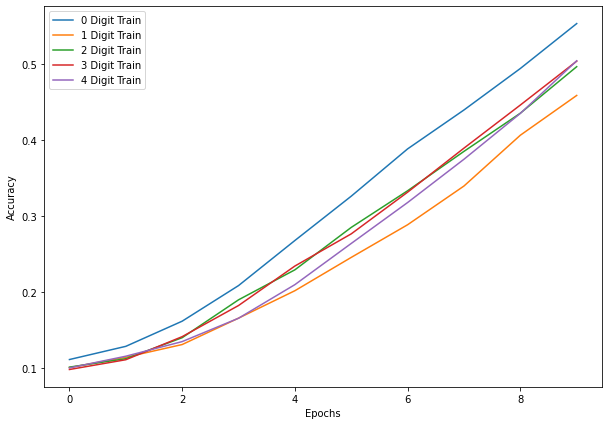

In [33]:
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.plot(digit_acc[i], label='%s Digit Train' % i)    

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Resnet_train_accuracy.jpg')
plt.show()

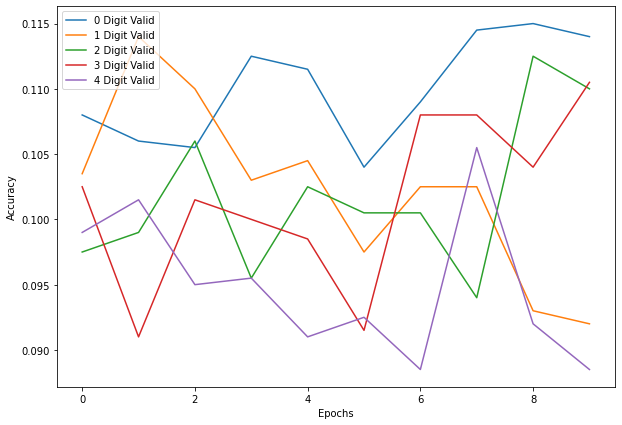

In [34]:
plt.figure(figsize=(10, 7))
for i in range(5):
    plt.plot(valid_digit_acc[i], label='%s Digit Valid' % i)    

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('Resnet_valid_accuracy.jpg')
plt.show()

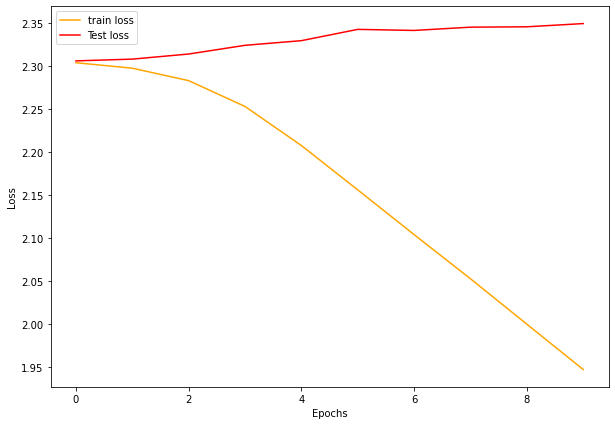

In [35]:
# loss plots
plt.figure(figsize=(10, 7))
plt.plot(
    train_loss, color='orange', linestyle='-', 
    label='train loss'
)
plt.plot(
    valid_loss, color='red', linestyle='-', 
    label='Test loss'
)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('Resnet_loss.jpg')
plt.show()